In [1]:
import common, hdr, hsda, mesh_ppi, hacc
import pyart
import numpy as np

from importlib import reload

imports static in hsda
imports static in mesh

## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [8]:
reload(mesh_ppi)
reload(hacc)
reload(common)

imports static in mesh


<module 'common' from '/home/meso/dev/pyhail/src/pyhail/common.py'>

In [9]:
filename = "/home/meso/66_20231110_063000.pvol.h5"
#filename = "/g/data/kl02/jss548/aura/testing_files/hail/66_20231110_063000.pvol.h5"
radar = pyart.aux_io.read_odim_h5(filename)
sweep0_idx = np.argmin(radar.fixed_angle['data'])

radar = hdr.pyart(radar,
                  'reflectivity_horizontal',
                  'differential_reflectivity')

radar = hsda.pyart(radar, 
          filename, 
          'reflectivity_horizontal', 
          'differential_reflectivity', 
          'cross_correlation_ratio', 
          'radar_classification',
          [4000, 5500], 
          [6, 7, 8])

radar = mesh_ppi.pyart(radar,
            [4000,5500],
            'reflectivity_horizontal')

radar = hacc.pyart(radar,
                    sweep0_idx, 
                    sweep0_idx,
                    4000, 
                    700)


[[9.66406493e-01 3.14803999e+00 5.32967306e+00 ... 1.13775201e+04
  1.13905469e+04 1.14035740e+04]
 [9.66406493e-01 3.14803999e+00 5.32967306e+00 ... 1.13775201e+04
  1.13905469e+04 1.14035740e+04]
 [9.66406493e-01 3.14803999e+00 5.32967306e+00 ... 1.13775201e+04
  1.13905469e+04 1.14035740e+04]
 ...
 [9.66406493e-01 3.14803999e+00 5.32967306e+00 ... 1.13775201e+04
  1.13905469e+04 1.14035740e+04]
 [9.66406493e-01 3.14803999e+00 5.32967306e+00 ... 1.13775201e+04
  1.13905469e+04 1.14035740e+04]
 [9.66406493e-01 3.14803999e+00 5.32967306e+00 ... 1.13775201e+04
  1.13905469e+04 1.14035740e+04]]


dict_keys(['reflectivity_horizontal', 'velocity_horizontal', 'total_power_horizontal', 'differential_reflectivity', 'cross_correlation_ratio', 'differential_phase', 'specific_differential_phase', 'hdr', 'hdr_size', 'radar_classification', 'hsda', 'ke', 'shi', 'mesh', 'posh', 'hacc'])


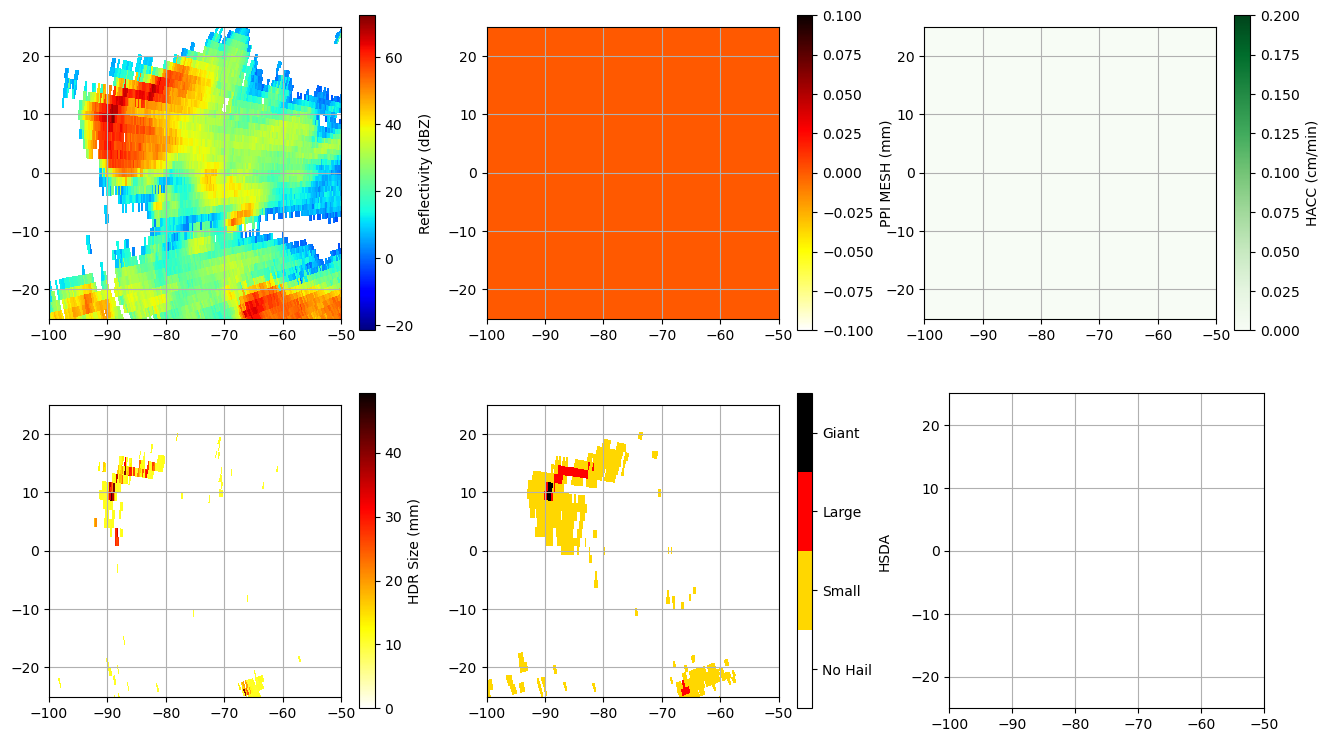

In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as pl
import matplotlib.colors as colors
import numpy as np

sweep0_x, sweep0_y, _ = radar.get_gate_x_y_z(sweep0_idx)

x_coords = sweep0_x/1000
y_coords = sweep0_y/1000
x_lim = [-100,-50]
y_lim = [-25, 25]
hsda_colors = [
    "White",
    "Gold",
    "Red",
    "Black",
    ]
hsda_cmap = colors.ListedColormap(hsda_colors) 

print(radar.fields.keys())

fig, axs = pl.subplots(nrows=2, ncols=3, figsize=(16, 9))
axs = axs.flatten()

im = axs[0].pcolormesh(x_coords, y_coords, radar.get_field(sweep0_idx, 'reflectivity_horizontal'), cmap='jet')
cbar = fig.colorbar(im, ax=axs[0], label='Reflectivity (dBZ)')

im = axs[1].pcolormesh(x_coords, y_coords, radar.get_field(sweep0_idx, 'mesh'), cmap='hot_r')
cbar = fig.colorbar(im, ax=axs[1], label='PPI MESH (mm)')

im = axs[2].pcolormesh(x_coords, y_coords, radar.get_field(sweep0_idx, 'hacc'), cmap='Greens', vmax=0.2)
cbar = fig.colorbar(im, ax=axs[2], label='HACC (cm/min)')

im = axs[3].pcolormesh(x_coords, y_coords, radar.get_field(sweep0_idx, 'hdr_size'), cmap='hot_r')
cbar = fig.colorbar(im, ax=axs[3], label='HDR Size (mm)')

im = axs[4].pcolormesh(x_coords, y_coords, radar.get_field(sweep0_idx, 'hsda'), cmap=hsda_cmap, vmin=-0.5, vmax=3.5)
cbar = fig.colorbar(im, ax=axs[4], label='HSDA')
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(["No Hail", "Small", "Large", "Giant"])


for ax in axs:
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.grid()
    ax.set_aspect('equal', 'box')

